In [3]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx
import mapclassify
import folium

In [4]:
density2010 = gpd.read_file('dash/dash2010density.shp')

In [5]:
density2010 = density2010.replace([np.inf, -np.inf], np.nan).dropna(subset=["pop_den_in"], how="all")
density2010

CVEGEO  pobtot          area    pop_den  pop_den_in  \
0    3105000010120  1642.0  3.684513e+05  44.564913    0.022439   
1    3105000010169  1618.0  9.872750e+05  16.388544    0.061018   
2    3105000010188  1709.0  4.821776e+05  35.443372    0.028214   
3    310500001021A  1666.0  5.688250e+05  29.288444    0.034143   
4    3105000010224   926.0  9.715592e+05   9.531071    0.104920   
..             ...     ...           ...        ...         ...   
505  3104100010691    23.0  1.701030e+05   1.352122    0.739578   
506  3104100010704  1034.0  1.290611e+06   8.011711    0.124817   
507  3104100010719   760.0  8.761131e+05   8.674680    0.115278   
508  3104100010723  1294.0  6.262305e+05  20.663318    0.048395   
509  3104100010738  1210.0  7.384161e+05  16.386424    0.061026   

                                              geometry  
0    POLYGON ((2764143.656 2479289.504, 2764145.335...  
1    POLYGON ((2761880.766 2478332.690, 2761889.991...  
2    POLYGON ((2764110.007 2478349.070, 2764166.774...  
3    POLYGON ((2760966.319 2476809.061, 2760907.648...  
4    POLYGON ((2761747.489 2477244.065, 2761744.829...  
..                                                 ...  
505  POLYGON ((2770200.455 2473965.565, 2770202.797...  
506  POLYGON ((2768075.802 2472356.969, 2768014.796...  
507  POLYGON ((2768075.802 2472356.969, 2768066.995...  
508  POLYGON ((2767741.353 2470134.192, 2767732.553...  
509  POLYGON ((2765366.125 2469887.659, 2765453.526...  

[510 rows x 6 columns]

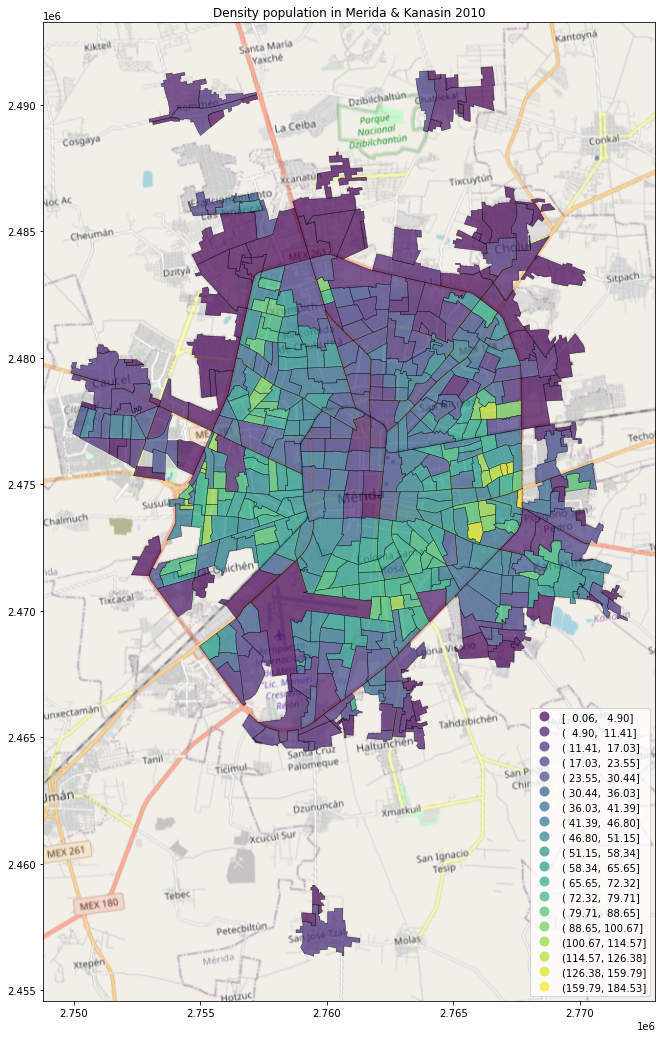

In [6]:
# Plotting 
f, ax = plt.subplots(1, figsize=(18, 18))


density2010.plot(ax=ax, column = 'pop_den', cmap = 'viridis', scheme='fisherjenks', legend = True, k=19,
        legend_kwds={"loc": 4},
            edgecolor='black',
        linewidth=0.5, 
        alpha=0.7)
contextily.add_basemap(ax, 
                        crs=density2010.crs,
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_title('Density population in Merida & Kanasin 2010')

plt.savefig('population_merida&Kanasin_density2010.jpg')

In [11]:
density2020 = gpd.read_file('dash/dash2020density.shp')

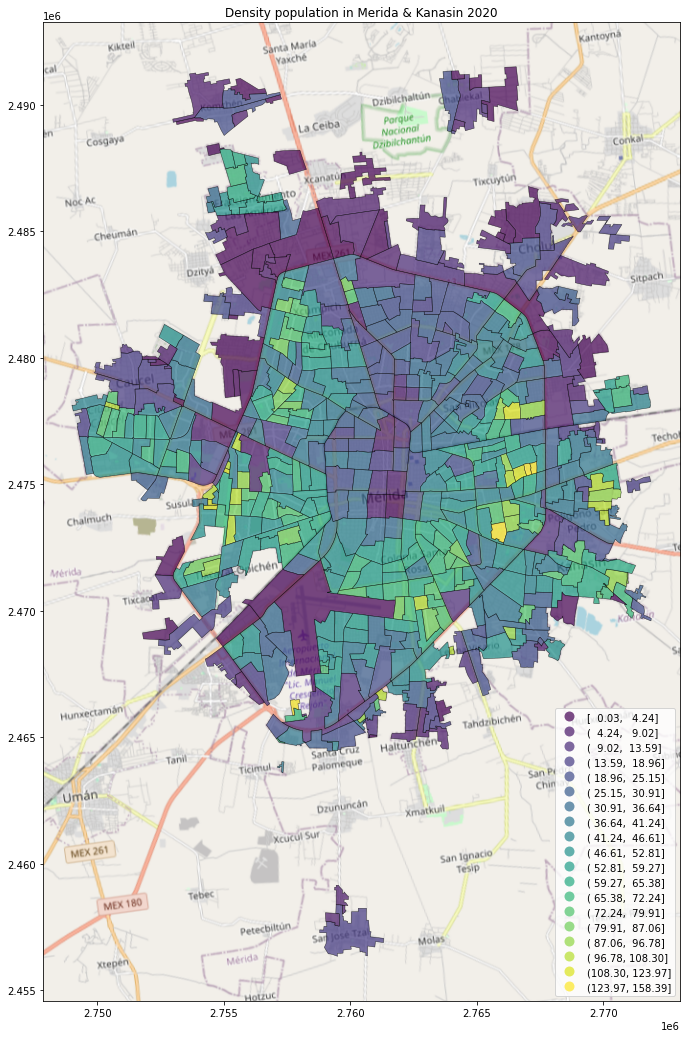

In [12]:
# Plotting 
f, ax = plt.subplots(1, figsize=(18, 18))


density2020 .plot(ax=ax, column = 'pop_den', cmap = 'viridis', scheme='fisherjenks', legend = True, k=19,
        edgecolor='black',
            legend_kwds={"loc": 4},
        linewidth=0.5, 
        alpha=0.7)
contextily.add_basemap(ax, 
                        crs=density2020 .crs,
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_title('Density population in Merida & Kanasin 2020')

plt.savefig('population_merida&Kanasin_density2020.jpg')

In [13]:
merida2020Pob = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")

In [14]:
merida2020Pob  = merida2020Pob  [['CVEGEO','POBTOT', 'geometry']]

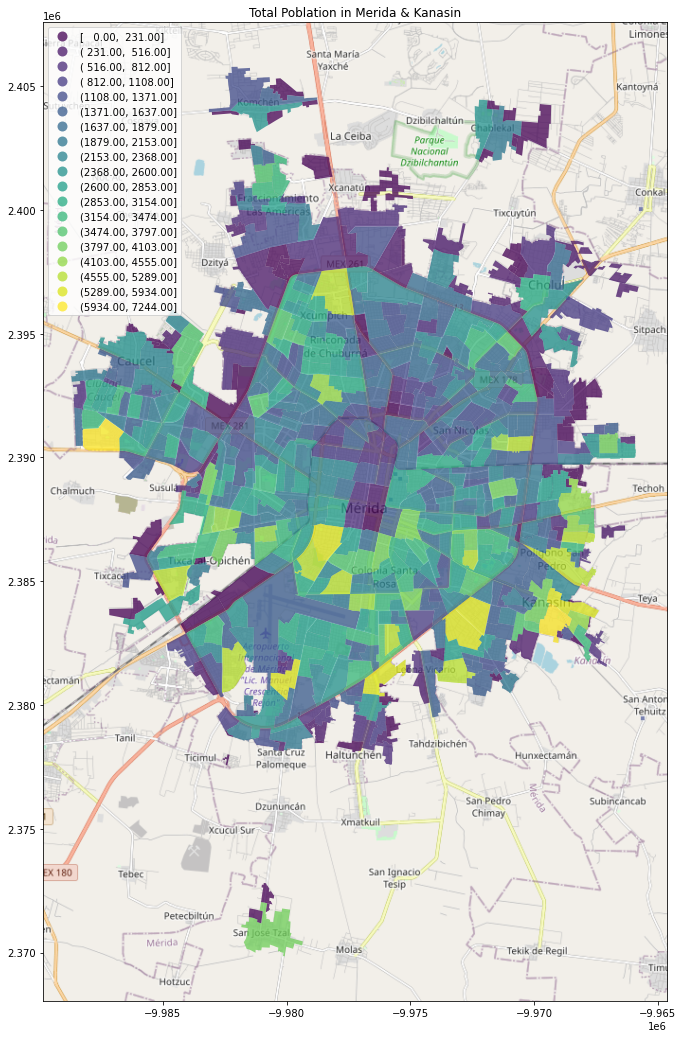

In [15]:
f, ax = plt.subplots(1, figsize=(18, 18))
merida2020Pob.plot(ax=ax, column='POBTOT', legend=True, scheme='fisherjenks',
         cmap='viridis' , edgecolor='black',
        k=19,
        linewidth=0., 
        alpha=0.75, 
        legend_kwds={"loc": 2},
       )
contextily.add_basemap(ax, 
                        crs=merida2020Pob.crs,
                       url=ctx.tile_providers.OSM_A
                      )
ax.set_title('Total Poblation in Merida & Kanasin')

plt.savefig('population_merida&Kanasin2020V2.jpg')


In [16]:
pobtotComparation20102020 = gpd.read_file("dash/pobtotComparation20102020.shp")

In [17]:
total2010 = pobtotComparation20102020['POBTOT2010'].sum()
total2020 = pobtotComparation20102020['POBTOT2020'].sum()

In [18]:
pobtotComparation20102020['Difference'] = ((pobtotComparation20102020['POBTOT2010']-pobtotComparation20102020['POBTOT2020']))
pobtotComparation20102020['Difference'].head()

0    198.0
1     38.0
2    171.0
3     95.0
4    232.0
Name: Difference, dtype: float64

In [19]:
#merida2010_20['Difference'].sort_values()
meridaNeg = (pobtotComparation20102020.loc[pobtotComparation20102020['Difference'] < 0])
meridaPos = pobtotComparation20102020.loc[pobtotComparation20102020['Difference'] >= 0]

In [20]:
meridaNeg['Difference'] = meridaNeg['Difference'].abs()

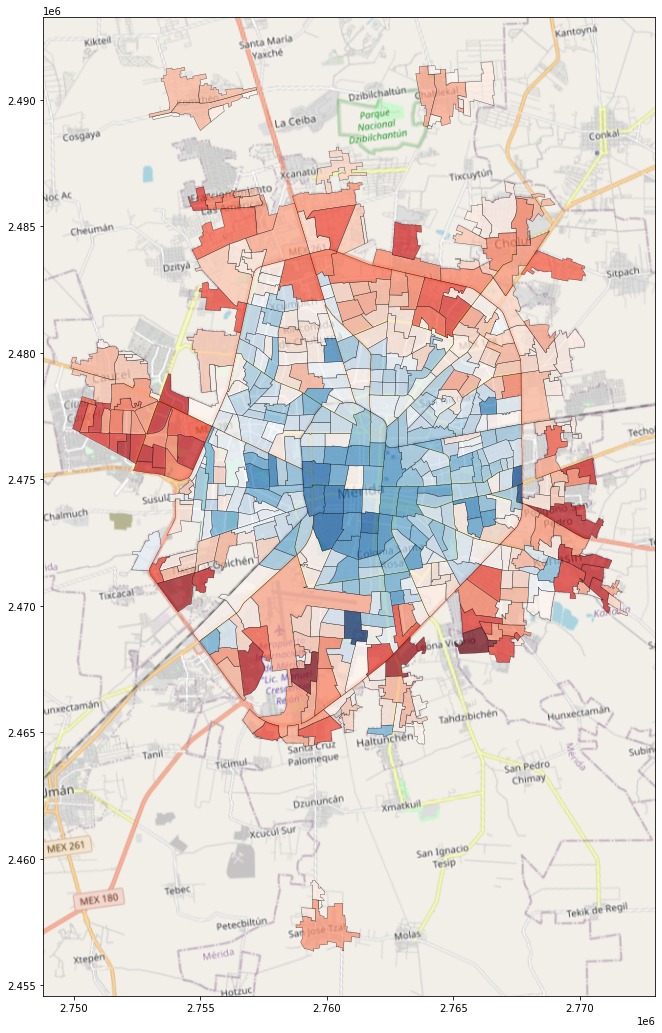

In [21]:
f, ax = plt.subplots(1, figsize=(18, 18))
meridaNeg.plot(ax=ax, column='Difference',
               scheme='fisherjenks', k=19,
         cmap='Reds' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7, 
       )
meridaPos.plot(ax=ax, column='Difference',  
               scheme='fisherjenks', k=19,
         cmap='Blues' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7
       )
contextily.add_basemap(ax, crs=pobtotComparation20102020.crs, url=ctx.tile_providers.OSM_A)
plt.savefig('prueba3.jpg')

In [22]:
pobtotComparation20102020Re = gpd.read_file("dash/pobtotComparation20102020Re.shp")

In [23]:
total2010 = pobtotComparation20102020Re['POBTOT2010'].sum()
total2020 =pobtotComparation20102020Re['POBTOT2020'].sum()

In [24]:
pobtotComparation20102020Re['Difference2'] = (((pobtotComparation20102020Re['POBTOT2010']/total2010) - (pobtotComparation20102020Re['POBTOT2020']/total2020)))
pobtotComparation20102020Re['Difference2'].head()

0    0.000413
1    0.000247
2    0.000394
3    0.000311
4    0.000355
Name: Difference2, dtype: float64

In [25]:
pobtotComparation20102020Re['Difference2'].sort_values()
meridaNegre = (pobtotComparation20102020Re.loc[pobtotComparation20102020Re['Difference2'] < 0])
meridaPosre = pobtotComparation20102020Re.loc[pobtotComparation20102020Re['Difference2'] >= 0]

In [26]:
meridaNegre['Difference2'] = meridaNegre['Difference2'].abs()

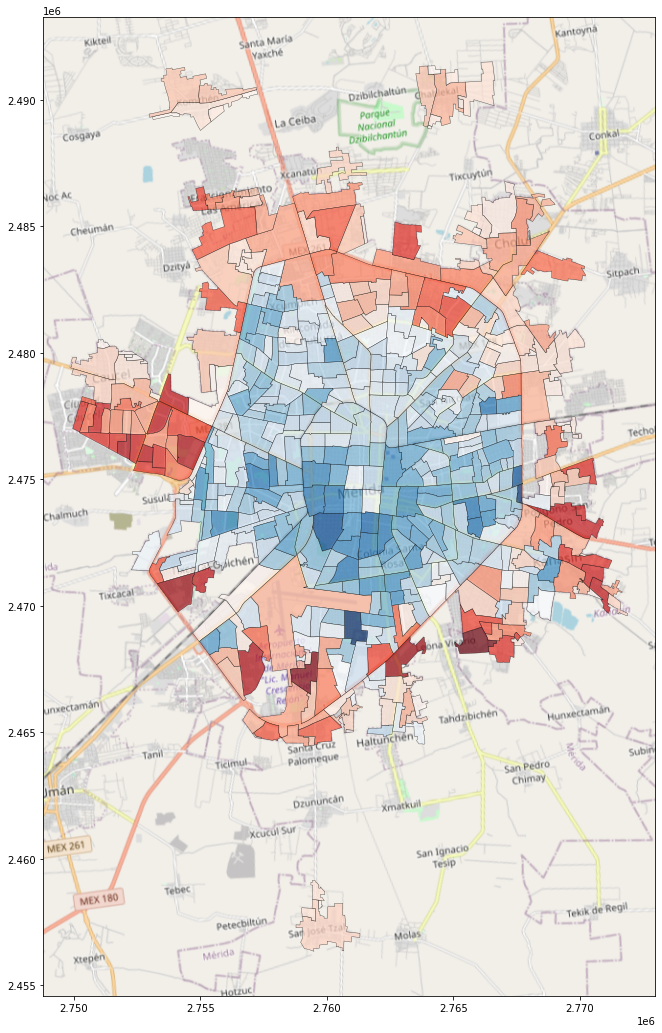

In [27]:
f, ax = plt.subplots(1, figsize=(18, 18))
meridaNegre.plot(ax=ax, column='Difference2',
               scheme='fisherjenks', k=19,
         cmap='Reds' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7, 
       )
meridaPosre.plot(ax=ax, column='Difference2',  
               scheme='fisherjenks', k=19,
         cmap='Blues' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7
       )
contextily.add_basemap(ax, crs=pobtotComparation20102020Re.crs, url=ctx.tile_providers.OSM_A)
plt.savefig('prueba4.jpg')

In [64]:
data = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")